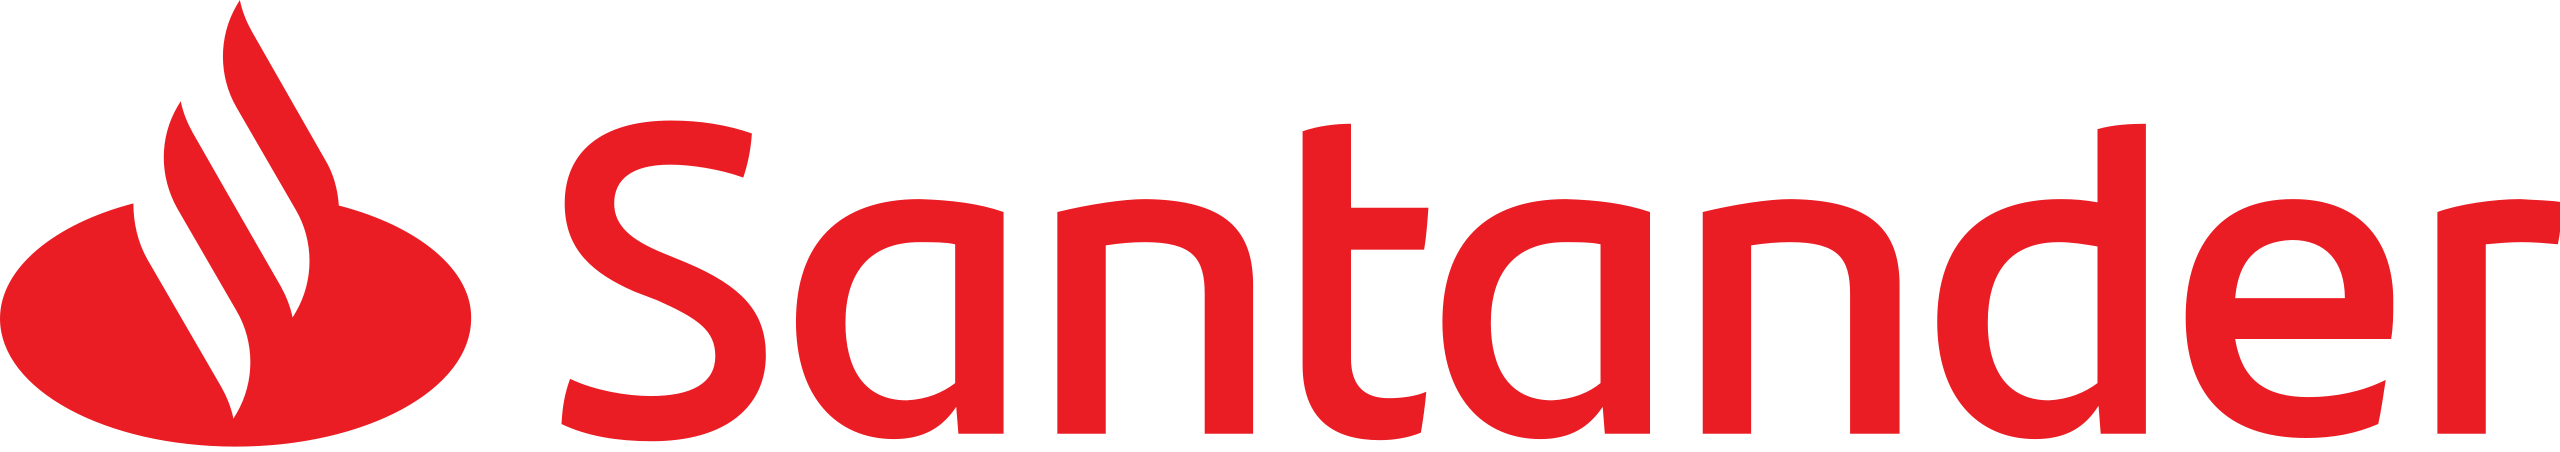

<div class="alert alert-block alert-info" style="font-size:14px; font-family:verdana;">
    📌 If you find this notebook📚 useful✨ and insightful💡, please give an upvote🔺🔺 and share your thoughts🧠 in the comment💬💬 section.
</div>

## **Context**

Santander Banking team has collected transaction data of the users from 2015 to 2016 who have been using their banking services. To improve the user experience we are required to recommend the banking services to the users using their profile or banking activity.

## **Objective**

To create a recommender system which can recommend services to the user/customer which can improve the user experience and can help the user/customer to choose servies effectively.

## **Notebook Contents**✨✨

1. [Setting Up View Of The Notebook](#setup_view)

2. [Importing Libraries](#import)

3. [Reading the data](#read)

4. [Data Cleaning & Pre-processing](#clean)
    * [4.1 - Treating Null Values](#clean-null)
    
    * [4.2 - Encoding Target Variable](#clean-encode)
    
    * [4.3 - Creating a user-item interaction matrix representing count](#clean-user-item-count)
    
    * [4.4 - Creating a user-item interaction matrix representing ratio](#clean-user-item-ratio)
    
    * [4.5 - Stacking user-item interaction into single column](#clean-user-item-stack)
    
    * [4.6 - Represent the data correctly](#clean-user-item-stack-proper)
    
5. [Collabrative Filtering - Model Based](#collab-model)
    * [5.1 - Import Libraries](#collab-model-import)
    
    * [5.2 - Create a Surprise Compatable Dataset](#collab-model-dataset)
    
    * [5.3 - Performing Cross Validation - SVD](#collab-model-cv-svd)
    
    * [5.4 - Create and Train a SVD Model](#collab-model-train-svd)
    
    * [5.5 - Make Predictions/Recommendations Using SVD](#collab-model-predict)
    
6. [Collabrative Filtering - Memory Based User-User Based](#collab-memory-user)
    * [6.1 - Removing users who have bought less than 3 different services](#collab-memory-user-remove)
    
    * [6.2 - Create a Surprise Compatable Dataset](#collab-memory-user-dataset)
    
    * [6.3 - Import Libraries](#collab-memory-user-import)
    
    * [6.4 - Perform Cross Validation](collab-memory-user-cv)
    
    * [6.5 - Configure and Train Model](collab-memory-user-train)
    
    * [6.6 - Make Predictions/Recommendations](#collab-memory-user-predict)
    
    
7. [Collabrative Filtering - Memory Based Item-Item Based](#collab-memory-item)
        
    * [7.1 - Perform Cross Validation](collab-memory-item-cv)
    
    * [7.2 - Configure and Train Model](collab-memory-item-train)
    
    * [7.3 - Make Predictions/Recommendations](#collab-memory-item-predict)
    


8. [Demographic & Activity Based Recommender System](#demo-act)
    * [8.1 - Null Value Treatement](#demo-act-null)
    
    * [8.2 - Checking Unique Categoty of Each Categorical Feature & Typecaste Variables](#demo-act-check-cat)
    
    * [8.3 - Encoding Categorical Variables](#demo-act-encode)
    
    * [8.4 - Preparing Dataset For Recommender System](#demo-act-dataset)
        * [8.4.1 - 1. Choose recent transaction for each user](#demo-act-recent)
        
        * [8.4.2 - 2. Create columns which store the count of services taken before the recent date by user](#demo-act-count_services)
        
    * [8.5 - Feature Creation Using Feature 'fecha_alta' and 'fecha_dato'](#feature-creation)
    
    * [8.6 - Split data as X and Y](#split-data)
    
    * [8.7 - Scale the data](#scale-data)
    
    * [8.8 - Perform Dimension Reduction](#dim-red)
    
    * [8.9 - Make Recommendations](#recommend)

## **Diving into the data**

We have a folder inside of which we have the datafiles in parquet format. In order to convert it to dataframe we would have to iteratively convert to dataframe and then merge all the dataframes as a single entity.

The data has the following features - 

* `fecha_dato` -   	The table is partitioned for this column


* `ncodpers` - 	Customer code


* `ind_empleado` - 	Employee index: A active, B ex employed, F filial, N not employee, P pasive


* `pais_residencia` - 	Customer's Country residence


* `sexo` - 	Customer's sex


* `age` - 	Age


* `fecha_alta` - 	The date in which the customer became as the first holder of a contract in the bank


* `ind_nuevo` - 	New customer Index. 1 if the customer registered in the last 6 months.


* `antiguedad` - 	Customer seniority (in months)


* `indrel` - 	1 (First/Primary), 99 (Primary customer during the month but not at the end of the month)


* `ult_fec_cli_1t` - 	Last date as primary customer (if he isn't at the end of the month)


* `indrel_1mes` - 	Customer type at the beginning of the month ,1 (First/Primary customer), 2 (co-owner ),P (Potential),3 (former primary), 4(former co-owner)


* `tiprel_1mes` -	Customer relation type at the beginning of the month, A (active), I (inactive), P (former customer),R (Potential)


* `indresi` - 	Residence index (S (Yes) or N (No) if the residence country is the same than the bank country)


* `indext` - 	Foreigner index (S (Yes) or N (No) if the customer's birth country is different than the bank country)


* `conyuemp` - 	Spouse index. 1 if the customer is spouse of an employee


* `canal_entrada` - 	channel used by the customer to join


* `indfall` - 	Deceased index. N/S


* `tipodom` - 	Addres type. 1, primary address


* `cod_prov` - 	Province code (customer's address)


* `nomprov` - 	Province name


* `ind_actividad_cliente` - 	Activity index (1, active customer; 0, inactive customer)


* `renta` - 	Gross income of the household


* `segmento` - 	segmentation: 01 - VIP, 02 - Individuals 03 - college graduated


* `ind_ahor_fin_ult1` - 	Saving Account


* `ind_aval_fin_ult1` - 	Guarantees


* `ind_cco_fin_ult1` - Current Accounts




* `ind_cder_fin_ult1` - 	Derivada Account


* `ind_cno_fin_ult1` - Payroll Account


* `ind_ctju_fin_ult1` - 	Junior Account


* `ind_ctma_fin_ult1` - 	Más particular Account


* `ind_ctop_fin_ult1` - 	particular Account


* `ind_ctpp_fin_ult1` - 	particular Plus Account


* `ind_deco_fin_ult1` - 	Short-term deposits


* `ind_deme_fin_ult1` - 	Medium-term deposits


* `ind_dela_fin_ult1` - 	Long-term deposits


* `ind_ecue_fin_ult1` - 	e-account


* `ind_fond_fin_ult1` - 	Funds


* `ind_hip_fin_ult1` - Mortgage


* `ind_plan_fin_ult1` - 	Pensions


* `ind_pres_fin_ult1` - 	Loans


* `ind_reca_fin_ult1` - 	Taxes


* `ind_tjcr_fin_ult1` - 	Credit Card


* `ind_valo_fin_ult1` - 	Securities


* `ind_viv_fin_ult1` - Home Account


* `ind_nomina_ult1` - Payroll


* `ind_nom_pens_ult1` - 	Pensions


* `ind_recibo_ult1` - Direct Debit

<a id='setup_view'></a>
## **Setting up the view of the notebook**

In [1]:
from IPython.core.display import display, HTML, Javascript

# ----- Notebook Theme -----
color_map = ['#6166B3', '#e8eff6', '#0b2553']

prompt = color_map[-1]
main_color = color_map[0]

css_file = '''

    div #notebook {
    background-color: white;
    line-height: 20px;
    }

    #notebook-container {
    %s
    margin-top: 2em;
    padding-top: 2em;
    border-top: 4px solid %s; /* light orange */
    -webkit-box-shadow: 0px 0px 8px 2px rgba(224, 212, 226, 0.5); /* pink */
    box-shadow: 0px 0px 8px 2px rgba(224, 212, 226, 0.5); /* pink */
    }

    div .input {
    margin-bottom: 1em;
    }

    .rendered_html h1, .rendered_html h2, .rendered_html h3, .rendered_html h4, .rendered_html h5, .rendered_html h6 {
    color: %s; /* light orange */
    font-weight: 600;
    }

    div.input_area {
    border: none;
        background-color: %s; /* rgba(229, 143, 101, 0.1); light orange [exactly #E58F65] */
        border-top: 2px solid %s; /* light orange */
    }

    div.input_prompt {
    color: %s; /* light blue */
    }

    div.output_prompt {
    color: %s; /* strong orange */
    }

    div.cell.selected:before, div.cell.selected.jupyter-soft-selected:before {
    background: %s; /* light orange */
    }

    div.cell.selected, div.cell.selected.jupyter-soft-selected {
        border-color: %s; /* light orange */
    }

    .edit_mode div.cell.selected:before {
    background: %s; /* light orange */
    }

    .edit_mode div.cell.selected {
    border-color: %s; /* light orange */

    }
    '''
def to_rgb(h): 
    return tuple(int(h[i:i+2], 16) for i in [0, 2, 4])

main_color_rgba = 'rgba(%s, %s, %s, 0.1)' % (to_rgb(main_color[1:]))
open('notebook.css', 'w').write(css_file % ('width: 95%;', main_color, main_color, main_color_rgba, main_color,  main_color, prompt, main_color, main_color, main_color, main_color))

def nb(): 
    return HTML("<style>" + open("notebook.css", "r").read() + "</style>")
nb()

/var/folders/91/g1qz4qmd3v347q0yzk9zj5tr0000gp/T/ipykernel_3904/111401022.py:1: DeprecationWarning: Importing display from IPython.core.display is deprecated since IPython 7.14, please import from IPython display
  from IPython.core.display import display, HTML, Javascript


<a id='import'></a>

## **Import Libraries**

In [2]:
# For Data Manipulation
import numpy as np
import pandas as pd
from datetime import datetime

# For Graphical Plots
import seaborn as sns
import matplotlib.pyplot as plt

# For Data Preprocessing
from sklearn.preprocessing import LabelEncoder
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from sklearn.metrics.pairwise import cosine_similarity

# ML Models used to fill null values
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import RandomForestClassifier

# To visualize iterations
from tqdm import tqdm

# For reading files and data
import os

# Ignore warnings
import warnings
warnings.filterwarnings("ignore")

In [3]:
# Configure to display maximum columns
pd.set_option("display.max_columns",1000)

In [4]:
!pwd

/Users/truongnd127/Documents


<a id='read'></a>
## **Reading The Dataset**

In [5]:
# Train data path - here paraquet files reside
train_folder = "/Users/truongnd127/Documents/paraquet files"

# Names of all the files inside the train folder
train_files = os.listdir(train_folder)

# Sort the files (as we will concatenate it later)
train_files.sort(key=len)

# Daatframes list
train_df_list = []

# Iterate through each file and read
for file in tqdm(train_files):
    # Complete file path
    train_file_path = os.path.join(train_folder, file)
    # Read the parquet file
    train_file = pd.read_parquet(train_file_path)
    # Append the dataframes
    train_df_list.append(train_file)

# Concatenate all the files
train_df = pd.concat(train_df_list, axis=0)

# Delete train_df_list to save space
del train_df_list

# Print head of dataframe
train_df.head()

100%|███████████████████████████████████████████| 35/35 [00:06<00:00,  5.39it/s]


,fecha_dato,ncodpers,ind_empleado,pais_residencia,sexo,age,fecha_alta,ind_nuevo,antiguedad,indrel,ult_fec_cli_1t,indrel_1mes,tiprel_1mes,indresi,indext,conyuemp,canal_entrada,indfall,tipodom,cod_prov,nomprov,ind_actividad_cliente,renta,segmento,ind_ahor_fin_ult1,ind_aval_fin_ult1,ind_cco_fin_ult1,ind_cder_fin_ult1,ind_cno_fin_ult1,ind_ctju_fin_ult1,ind_ctma_fin_ult1,ind_ctop_fin_ult1,ind_ctpp_fin_ult1,ind_deco_fin_ult1,ind_deme_fin_ult1,ind_dela_fin_ult1,ind_ecue_fin_ult1,ind_fond_fin_ult1,ind_hip_fin_ult1,ind_plan_fin_ult1,ind_pres_fin_ult1,ind_reca_fin_ult1,ind_tjcr_fin_ult1,ind_valo_fin_ult1,ind_viv_fin_ult1,ind_nomina_ult1,ind_nom_pens_ult1,ind_recibo_ult1
__null_dask_index__,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
0,2015-03-28,282477.0,N,ES,H,42,2001-10-15,0.0,165,1.0,None,1.0,I,S,N,None,KAT,N,1.0,46.0,VALENCIA,0.0,62604.871094,02 - PARTICULARES,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,2015-03-28,282244.0,N,ES,V,65,2001-10-15,0.0,165,1.0,None,1.0,A,S,N,None,KAT,N,1.0,33.0,ASTURIAS,1.0,167388.906250,01 - TOP,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,2015-03-28,282239.0,N,ES,V,89,2001-10-15,0.0,165,1.0,None,1.0,A,S,N,None,KFA,N,1.0,28.0,MADRID,1.0,182942.515625,01 - TOP,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,2015-03-28,282236.0,N,ES,V,55,2001-10-15,0.0,165,1.0,None,1.0,I,S,N,None,KAT,N,1.0,28.0,MADRID,0.0,132949.921875,02 - PARTICULARES,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,2015-03-28,282231.0,N,ES,V,86,2001-10-15,0.0,165,1.0,None,1.0,I,S,N,None,KAT,N,1.0,28.0,MADRID,1.0,120408.390625,02 - PARTICULARES,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [6]:
# Reading data description which will be used later
# data_desc = pd.read_csv("D:/DATA SCIENCE/Kaggle Datasets/Santander Product Recommendation/santander-product-recommendation/train_ver2.csv/data_desc.csv")

<a id='clean'></a>

## **Data Cleaning & Preprocessing**

In [7]:
# Drop the index
train_df.reset_index(drop=True, inplace=True)

# Print head of data frame
train_df.head()

,fecha_dato,ncodpers,ind_empleado,pais_residencia,sexo,age,fecha_alta,ind_nuevo,antiguedad,indrel,ult_fec_cli_1t,indrel_1mes,tiprel_1mes,indresi,indext,conyuemp,canal_entrada,indfall,tipodom,cod_prov,nomprov,ind_actividad_cliente,renta,segmento,ind_ahor_fin_ult1,ind_aval_fin_ult1,ind_cco_fin_ult1,ind_cder_fin_ult1,ind_cno_fin_ult1,ind_ctju_fin_ult1,ind_ctma_fin_ult1,ind_ctop_fin_ult1,ind_ctpp_fin_ult1,ind_deco_fin_ult1,ind_deme_fin_ult1,ind_dela_fin_ult1,ind_ecue_fin_ult1,ind_fond_fin_ult1,ind_hip_fin_ult1,ind_plan_fin_ult1,ind_pres_fin_ult1,ind_reca_fin_ult1,ind_tjcr_fin_ult1,ind_valo_fin_ult1,ind_viv_fin_ult1,ind_nomina_ult1,ind_nom_pens_ult1,ind_recibo_ult1
0,2015-03-28,282477.0,N,ES,H,42,2001-10-15,0.0,165,1.0,None,1.0,I,S,N,None,KAT,N,1.0,46.0,VALENCIA,0.0,62604.871094,02 - PARTICULARES,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,2015-03-28,282244.0,N,ES,V,65,2001-10-15,0.0,165,1.0,None,1.0,A,S,N,None,KAT,N,1.0,33.0,ASTURIAS,1.0,167388.906250,01 - TOP,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,2015-03-28,282239.0,N,ES,V,89,2001-10-15,0.0,165,1.0,None,1.0,A,S,N,None,KFA,N,1.0,28.0,MADRID,1.0,182942.515625,01 - TOP,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,2015-03-28,282236.0,N,ES,V,55,2001-10-15,0.0,165,1.0,None,1.0,I,S,N,None,KAT,N,1.0,28.0,MADRID,0.0,132949.921875,02 - PARTICULARES,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,2015-03-28,282231.0,N,ES,V,86,2001-10-15,0.0,165,1.0,None,1.0,I,S,N,None,KAT,N,1.0,28.0,MADRID,1.0,120408.390625,02 - PARTICULARES,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [8]:
# Checking percentage of null values
train_df.isnull().mean() * 100

fecha_dato                0.000000
ncodpers                  0.000000
ind_empleado              0.203220
pais_residencia           0.203220
sexo                      0.203732
age                       0.000000
fecha_alta                0.203220
ind_nuevo                 0.203220
antiguedad                0.000000
indrel                    0.203220
ult_fec_cli_1t           99.818330
indrel_1mes               1.097513
tiprel_1mes               1.097513
indresi                   0.203220
indext                    0.203220
conyuemp                 99.986752
canal_entrada             1.363829
indfall                   0.203220
tipodom                   0.203227
cod_prov                  0.685784
nomprov                   0.685784
ind_actividad_cliente     0.203220
renta                    20.475648
segmento                  1.387585
ind_ahor_fin_ult1         0.000000
ind_aval_fin_ult1         0.000000
ind_cco_fin_ult1          0.000000
ind_cder_fin_ult1         0.000000
ind_cno_fin_ult1    

<a id='clean-null'></a>

### **Treating Null Values**

In [9]:
# Deleting 'conyuemp' and 'ult_fec_cli_1t' as 99% of values were missing
train_df.drop(columns=['ult_fec_cli_1t','conyuemp'], inplace=True)

In [10]:
# Checking dataframe of null for feature ind_empleado as 0.203220 null value seems common in many features
train_df[train_df['ind_empleado'].isnull()]

,fecha_dato,ncodpers,ind_empleado,pais_residencia,sexo,age,fecha_alta,ind_nuevo,antiguedad,indrel,indrel_1mes,tiprel_1mes,indresi,indext,canal_entrada,indfall,tipodom,cod_prov,nomprov,ind_actividad_cliente,renta,segmento,ind_ahor_fin_ult1,ind_aval_fin_ult1,ind_cco_fin_ult1,ind_cder_fin_ult1,ind_cno_fin_ult1,ind_ctju_fin_ult1,ind_ctma_fin_ult1,ind_ctop_fin_ult1,ind_ctpp_fin_ult1,ind_deco_fin_ult1,ind_deme_fin_ult1,ind_dela_fin_ult1,ind_ecue_fin_ult1,ind_fond_fin_ult1,ind_hip_fin_ult1,ind_plan_fin_ult1,ind_pres_fin_ult1,ind_reca_fin_ult1,ind_tjcr_fin_ult1,ind_valo_fin_ult1,ind_viv_fin_ult1,ind_nomina_ult1,ind_nom_pens_ult1,ind_recibo_ult1
125,2015-03-28,282308.0,None,None,None,NA,None,NaN,NA,NaN,None,None,None,None,None,None,NaN,NaN,None,NaN,NaN,None,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,NaN,NaN,0.0
190,2015-03-28,283560.0,None,None,None,NA,None,NaN,NA,NaN,None,None,None,None,None,None,NaN,NaN,None,NaN,NaN,None,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
217,2015-03-28,283458.0,None,None,None,NA,None,NaN,NA,NaN,None,None,None,None,None,None,NaN,NaN,None,NaN,NaN,None,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
221,2015-03-28,283450.0,None,None,None,NA,None,NaN,NA,NaN,None,None,None,None,None,None,NaN,NaN,None,NaN,NaN,None,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
331,2015-03-28,283137.0,None,None,None,NA,None,NaN,NA,NaN,None,None,None,None,None,None,NaN,NaN,None,NaN,NaN,None,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3892675,2015-06-28,395667.0,None,None,None,NA,None,NaN,NA,NaN,None,None,None,None,None,None,NaN,NaN,None,NaN,NaN,None,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,NaN,NaN,0.0
3893107,2015-06-28,394818.0,None,None,None,NA,None,NaN,NA,NaN,None,None,None,None,None,None,NaN,NaN,None,NaN,NaN,None,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,NaN,NaN,0.0
3893211,2015-06-28,396576.0,None,None,None,NA,None,NaN,NA,NaN,None,None,None,None,None,None,NaN,NaN,None,NaN,NaN,None,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,NaN,NaN,0.0
3893286,2015-06-28,397156.0,None,None,None,NA,None,NaN,NA,NaN,None,None,None,None,None,None,NaN,NaN,None,NaN,NaN,None,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,NaN,NaN,0.0


* We can see we have records have no information about the user except the service opted data. We cannot use such data for our demographic based recommender system, however we can use it for the collabrative filtering recommender systems as user's data is not required, instead we want service opted data.


* We will delete these records later, as we will be creating Collabrative Filtering First!

* We can see that there are records where no service opted exists, but there exists null values in service `ind_nomina_ult1` and `ind_nom_pens_ult1`, there are also records where the service opted exists and the values in these 2 columns are null.


* We will drop the records with no service opted later as we convert to label format.

In [11]:
# Checking records with null value in colum ind_nomina_ult1
train_df[train_df['ind_nomina_ult1'].isnull()]

,fecha_dato,ncodpers,ind_empleado,pais_residencia,sexo,age,fecha_alta,ind_nuevo,antiguedad,indrel,indrel_1mes,tiprel_1mes,indresi,indext,canal_entrada,indfall,tipodom,cod_prov,nomprov,ind_actividad_cliente,renta,segmento,ind_ahor_fin_ult1,ind_aval_fin_ult1,ind_cco_fin_ult1,ind_cder_fin_ult1,ind_cno_fin_ult1,ind_ctju_fin_ult1,ind_ctma_fin_ult1,ind_ctop_fin_ult1,ind_ctpp_fin_ult1,ind_deco_fin_ult1,ind_deme_fin_ult1,ind_dela_fin_ult1,ind_ecue_fin_ult1,ind_fond_fin_ult1,ind_hip_fin_ult1,ind_plan_fin_ult1,ind_pres_fin_ult1,ind_reca_fin_ult1,ind_tjcr_fin_ult1,ind_valo_fin_ult1,ind_viv_fin_ult1,ind_nomina_ult1,ind_nom_pens_ult1,ind_recibo_ult1
125,2015-03-28,282308.0,None,None,None,NA,None,NaN,NA,NaN,None,None,None,None,None,None,NaN,NaN,None,NaN,NaN,None,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,NaN,NaN,0.0
717,2015-03-28,280896.0,None,None,None,NA,None,NaN,NA,NaN,None,None,None,None,None,None,NaN,NaN,None,NaN,NaN,None,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,NaN,NaN,0.0
981,2015-03-28,281418.0,None,None,None,NA,None,NaN,NA,NaN,None,None,None,None,None,None,NaN,NaN,None,NaN,NaN,None,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,NaN,NaN,0.0
982,2015-03-28,281417.0,None,None,None,NA,None,NaN,NA,NaN,None,None,None,None,None,None,NaN,NaN,None,NaN,NaN,None,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,NaN,NaN,0.0
1315,2015-03-28,285659.0,None,None,None,NA,None,NaN,NA,NaN,None,None,None,None,None,None,NaN,NaN,None,NaN,NaN,None,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,NaN,NaN,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3892675,2015-06-28,395667.0,None,None,None,NA,None,NaN,NA,NaN,None,None,None,None,None,None,NaN,NaN,None,NaN,NaN,None,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,NaN,NaN,0.0
3893107,2015-06-28,394818.0,None,None,None,NA,None,NaN,NA,NaN,None,None,None,None,None,None,NaN,NaN,None,NaN,NaN,None,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,NaN,NaN,0.0
3893211,2015-06-28,396576.0,None,None,None,NA,None,NaN,NA,NaN,None,None,None,None,None,None,NaN,NaN,None,NaN,NaN,None,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,NaN,NaN,0.0
3893286,2015-06-28,397156.0,None,None,None,NA,None,NaN,NA,NaN,None,None,None,None,None,None,NaN,NaN,None,NaN,NaN,None,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,NaN,NaN,0.0


<a id='clean-encode'></a>
### **Encoding the target for making recommedations**

* As we want to make recommendations, we will have to convert the one-hot encoded vectors(target) to label encodings. After encoding, using sklearn's label encoder object we can get the name of the service easily...


* We will use this encoder object to create a user-item interaction matrix and to use it as a target in content based recommender system

In [12]:
# Define label encoder object
le = LabelEncoder()

# Convert one-hot encoded vectors to a single column
raw_target = train_df.iloc[:, 22:].idxmax(1)

# Fit transform the labels
transformed_target = le.fit_transform(raw_target)

# Concatenate the column to dataframe
train_df['service_opted'] = transformed_target

# Typecaste to uint8 to save memory
train_df['service_opted'] = train_df['service_opted'].astype('uint8')

# Print the dataframe
train_df.head(10)

,fecha_dato,ncodpers,ind_empleado,pais_residencia,sexo,age,fecha_alta,ind_nuevo,antiguedad,indrel,indrel_1mes,tiprel_1mes,indresi,indext,canal_entrada,indfall,tipodom,cod_prov,nomprov,ind_actividad_cliente,renta,segmento,ind_ahor_fin_ult1,ind_aval_fin_ult1,ind_cco_fin_ult1,ind_cder_fin_ult1,ind_cno_fin_ult1,ind_ctju_fin_ult1,ind_ctma_fin_ult1,ind_ctop_fin_ult1,ind_ctpp_fin_ult1,ind_deco_fin_ult1,ind_deme_fin_ult1,ind_dela_fin_ult1,ind_ecue_fin_ult1,ind_fond_fin_ult1,ind_hip_fin_ult1,ind_plan_fin_ult1,ind_pres_fin_ult1,ind_reca_fin_ult1,ind_tjcr_fin_ult1,ind_valo_fin_ult1,ind_viv_fin_ult1,ind_nomina_ult1,ind_nom_pens_ult1,ind_recibo_ult1,service_opted
0,2015-03-28,282477.0,N,ES,H,42,2001-10-15,0.0,165,1.0,1.0,I,S,N,KAT,N,1.0,46.0,VALENCIA,0.0,62604.871094,02 - PARTICULARES,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
1,2015-03-28,282244.0,N,ES,V,65,2001-10-15,0.0,165,1.0,1.0,A,S,N,KAT,N,1.0,33.0,ASTURIAS,1.0,167388.906250,01 - TOP,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2
2,2015-03-28,282239.0,N,ES,V,89,2001-10-15,0.0,165,1.0,1.0,A,S,N,KFA,N,1.0,28.0,MADRID,1.0,182942.515625,01 - TOP,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2
3,2015-03-28,282236.0,N,ES,V,55,2001-10-15,0.0,165,1.0,1.0,I,S,N,KAT,N,1.0,28.0,MADRID,0.0,132949.921875,02 - PARTICULARES,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,7
4,2015-03-28,282231.0,N,ES,V,86,2001-10-15,0.0,165,1.0,1.0,I,S,N,KAT,N,1.0,28.0,MADRID,1.0,120408.390625,02 - PARTICULARES,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2
5,2015-03-28,282229.0,N,ES,H,49,2002-03-25,0.0,160,1.0,1.0,I,S,N,KAT,N,1.0,28.0,MADRID,0.0,104093.757812,02 - PARTICULARES,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2
6,2015-03-28,282218.0,N,ES,V,49,2001-10-15,0.0,165,1.0,1,A,S,N,KFC,N,1.0,46.0,VALENCIA,1.0,48310.500000,02 - PARTICULARES,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2
7,2015-03-28,282217.0,N,ES,V,72,2001-10-15,0.0,165,1.0,1,A,S,N,KFC,N,1.0,28.0,MADRID,1.0,118175.398438,02 - PARTICULARES,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2
8,2015-03-28,282216.0,N,ES,H,45,2001-10-15,0.0,165,1.0,1,I,S,N,KFC,N,1.0,28.0,MADRID,1.0,118175.398438,02 - PARTICULARES,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2
9,2015-03-28,282215.0,N,ES,V,42,2001-10-15,0.0,63,1.0,1,A,S,N,RED,N,1.0,41.0,SEVILLA,1.0,141276.906250,01 - TOP,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,1.0,4


In [13]:
# # Checking the value count of the products
# plt.figure(figsize=(12,8))

# # Get the name and the occurences
# names = raw_target.value_counts().index
# values = raw_target.value_counts().values

# # Map the names with their english translation via data_desc
# names = [data_desc[data_desc['Column Name'] == name]['Description'].values[0] for name in names]

# # Plot the plot
# ax = sns.barplot(x=names, y=values)

# # Set the title
# ax.set_title("Number Of Services Opted In Millions")

# # Set the xticklabels and rotate
# ax.set_xticklabels(ax.get_xticklabels(), rotation=90)

# # Label the bars
# for p in ax.patches:
#     ax.annotate("{:.1f}".format(p.get_height()), (p.get_x(), p.get_height()), rotation=25)

# # Show the plot
# plt.show()

<a id='clean-user-item-count'></a>
### **Creating a user-item interaction matrix representing count**

* We want to create a dataset with 3 column which are namely - user_id, item_id and rating. As we are recommending a banking service, we have user_id and item_id but we do not know what the rating is. So we will create a customer satisfaction metric(service selection ratio) which can replace rating. 


* We will first calculate the number of times a user has opted for a service. Then for each user we will divive the count of each service with the total number of services the user has opted throughout his/her banking journey.


* It ranges from 0-1.

In [14]:
# Creating a user-item matrix, each entry indicates the number of times service opted by that user
user_item_matrix = pd.crosstab(index=train_df.ncodpers, columns=le.transform(raw_target), values=1, aggfunc='sum')

# Filling nan values as 0 as service is not opted
user_item_matrix.fillna(0, inplace=True)

# Print the user-item matrix(Represents Count)
user_item_matrix

col_0,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23
ncodpers,,,,,,,,,,,,,,,,,,,,,,,,
15889.0,0.0,0.0,17.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
15890.0,0.0,0.0,0.0,0.0,17.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
15891.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
15892.0,0.0,0.0,12.0,0.0,5.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
15893.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,15.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1553685.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1553686.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1553687.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


<a id='clean-user-item-ratio'></a>
### **Creating a user-item interaction matrix representing ratio**

In [15]:
# Convert the user_item_matrix to array datatype
uim_arr = np.array(user_item_matrix)

# Iterate through each row(user)
for row,item in tqdm(enumerate(uim_arr)):
    # Iterate through each column(item)
    for column,item_value in enumerate(item):
        # Change the count of service opted to ratio
        uim_arr[row, column] = uim_arr[row, column] / sum(item)
        
# Convert the array to dataframe for better view
user_item_ratio_matrix = pd.DataFrame(uim_arr, columns=user_item_matrix.columns, index=user_item_matrix.index)

# Print the user_item_ratio_matrix(Represents the ratio)
user_item_ratio_matrix

956645it [01:01, 15623.85it/s]


col_0,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23
ncodpers,,,,,,,,,,,,,,,,,,,,,,,,
15889.0,0.0,0.0,1.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0
15890.0,0.0,0.0,0.000000,0.0,1.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0
15891.0,0.5,0.0,0.666667,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0
15892.0,0.0,0.0,0.705882,0.0,0.876289,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0
15893.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.117647,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.992218,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1553685.0,1.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0
1553686.0,1.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0
1553687.0,1.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0


In [17]:
user_item_ratio_matrix.to_csv("user_item_ratio_matrix.csv", index = False)

NameError: name 'hi' is not defined

In [20]:
from scipy.sparse import csr_matrix

movie_user_mat_sparse = csr_matrix(user_item_ratio_matrix.values)

In [23]:
%%time
import numpy as np
from sklearn.neighbors import NearestNeighbors
from sklearn.metrics import mean_squared_error
from math import sqrt
from scipy.sparse import csr_matrix

# Tạo một ma trận sparse từ user_item_ratio_matrix.values
movie_user_mat_sparse = csr_matrix(user_item_ratio_matrix.values)

def calculate_rmse(U, k):
    # Khởi tạo mô hình k-NN
    model = NearestNeighbors(n_neighbors=k, metric='cosine', algorithm='brute', n_jobs=-1)
    
    # Xây dựng mô hình trên ma trận sparse
    model.fit(U)
    
    # Dự đoán các giá trị trong ma trận utility
    distances, indices = model.kneighbors(U, n_neighbors=k)
    
    # Tạo một ma trận sparse cho các dự đoán
    predictions = csr_matrix((U.shape[0], U.shape[1]), dtype=np.float64)
    
    for i in range(U.shape[0]):
        neighbor_indices = indices[i]
        neighbor_distances = distances[i]
        for j in range(U.shape[1]):
            numerator = 0
            denominator = 0
            for n in range(k):
                neighbor_index = neighbor_indices[n]
                neighbor_distance = neighbor_distances[n]
                numerator += neighbor_distance * U[neighbor_index, j]
                denominator += neighbor_distance
            if denominator != 0:
                predictions[i, j] = numerator / denominator
    
    # Tính toán RMSE
    rmse = sqrt(mean_squared_error(U.toarray(), predictions.toarray()))
    
    return rmse

# Sử dụng ma trận utility matrix U và giá trị k của bạn
k = 10  # Thay đổi giá trị k tùy theo mong muốn

rmse = calculate_rmse(movie_user_mat_sparse, k)
print("RMSE:", rmse)


KeyboardInterrupt: 

<a id='clean-user-item-stack'></a>
### **Stacking into a single column**

In [ ]:
# Stack the user_item_ratio_matrix to get all values in single column
user_item_ratio_stacked = user_item_ratio_matrix.stack().to_frame()

# Create column for user id
user_item_ratio_stacked['ncodpers'] = [index[0] for index in user_item_ratio_stacked.index]

# Create column for service_opted
user_item_ratio_stacked['service_opted'] = [index[1] for index in user_item_ratio_stacked.index]

# Reset and drop the index
user_item_ratio_stacked.reset_index(drop=True, inplace=True)

# Print the dataframe
user_item_ratio_stacked

<a id='clean-user-item-stack-proper'></a>

### **Properly represent the data**

In [ ]:
# Rename the column 0 to service_selection_ratio
user_item_ratio_stacked.rename(columns={0:"service_selection_ratio"}, inplace=True)

# Arange the column systematicaly for better view
user_item_ratio_stacked = user_item_ratio_stacked[['ncodpers','service_opted', 'service_selection_ratio']]

# Drop all the rows with 0 entries as it means the user has never opted for the service
user_item_ratio_stacked.drop(user_item_ratio_stacked[user_item_ratio_stacked['service_selection_ratio']==0].index, inplace=True)

# Reset the index
user_item_ratio_stacked.reset_index(drop=True, inplace=True)

# Display the final dataframe
user_item_ratio_stacked

In [ ]:
user_item_ratio_stacked.to_parquet("user_item_ratio_stacked.parquet")

* The above dataset will be used for collabrative filtering, wherein the service selection ratio will act as rating from the user

<a id='collab-model'></a>

## **Collabrative Filtering - Model Based**

<a id='collab-model-import'></a>
### **Import Libraries**

In [ ]:
import surprise

from surprise import Dataset, Reader

from surprise.prediction_algorithms.matrix_factorization import SVD

from surprise.model_selection import cross_validate

from surprise import accuracy

<a id='collab-model-dataset'></a>
### **Create Surprise Compatable Dataset**

In [ ]:
# Initialize a surprise reader object
reader = Reader(line_format='user item rating', sep=',', rating_scale=(0,1), skip_lines=1)

# Load the data
data = Dataset.load_from_df(user_item_ratio_stacked, reader=reader)

# Build trainset object(perform this only when you are using whole dataset to train)
trainset = data.build_full_trainset()

<a id='collab-model-cv-svd'></a>
### **Perform Cross Validation**

In [ ]:
# Initialize model
svd = SVD()

# Cross Validate
svd_results = cross_validate(algo=svd, data=data, cv=4)

# Results!
svd_results

<a id='collab-model-train-svd'></a>
### **Create and Train Model**

In [ ]:
# Initialize model
svd = SVD()

# cross-validate
svd.fit(trainset)

<a id='collab-model-predict'></a>
### **Make Predictions/Recommendations**

In [ ]:
def get_recommendation(uid,model):    
    recommendations = [(uid, sid, data_desc[data_desc['Column Name'] == le.inverse_transform([sid])[0]]['Description'].values[0], model.predict(uid,sid).est) for sid in range(24)]
    # Convert to pandas dataframe
    recommendations = pd.DataFrame(recommendations, columns=['uid', 'sid', 'service_name', 'pred'])
    # Sort by pred
    recommendations.sort_values("pred", ascending=False, inplace=True)
    # Reset index
    recommendations.reset_index(drop=True, inplace=True)
    # Return
    return recommendations

In [ ]:
get_recommendation(15890.0,svd)

<a id='collab-memory-user'></a>

## **Collabrative Filtering - Memory Based**

### User Memory Based Recommender System

As there are ~ 9,50,000 users the process of the recommending products might get computationally expensive and even can cause memory shortage issues, so we would be removing the users who have opted for more than 3 services

<a id='collab-memory-user-remove'></a>
#### **Removing users who have bought atleast 3 different services**

In [ ]:
# Printing the shape and the dataframe of stacked ratio df
print(user_item_ratio_stacked.shape)
user_item_ratio_stacked.head()

In [ ]:
# Empty list of users to remove
user_to_remove = []

for index, row in tqdm(enumerate(user_item_matrix.values)):
    # Count the number of non-zero elements 
    non_zeroes = np.count_nonzero(row)
    # Check if non_zeros is less than 3
    if non_zeroes < 3:
        # Append the user id to the list
        user_to_remove.append(user_item_matrix.index[index])

In [ ]:
# Fetch the index from the user_item_ratio_stacked where the user_to_del exists
user_to_remove = user_item_ratio_stacked[user_item_ratio_stacked['ncodpers'].isin(user_to_remove)].index

# Remove the elements from user_item_ratio_stacked
user_item_ratio_stacked_reduced = user_item_ratio_stacked.drop(user_to_remove, axis=0, inplace=False)

# Print the shape and the dataframe
print(user_item_ratio_stacked_reduced.shape)
user_item_ratio_stacked_reduced.head()

<a id='collab-model-user-dataset'></a>
#### **Create surprise compatable dataset**

In [ ]:
# Initialize a surprise reader object
reader = Reader(line_format='user item rating', sep=',', rating_scale=(0,1), skip_lines=1)

# Load the data
data_reduced = Dataset.load_from_df(user_item_ratio_stacked_reduced, reader=reader)

# Build trainset object(perform this only when you are using whole dataset to train)
trainset_reduced = data_reduced.build_full_trainset()

<a id='collab-memory-user-import'></a>
#### **Import Libraries**

In [ ]:
from surprise.prediction_algorithms.knns import KNNBasic

<a id='collab-memory-user-cv'></a>
#### **Perform Cross Validation**

In [ ]:
# Declaring the similarity options.
sim_options = {'name': 'cosine',
               'user_based': True}

# KNN algorithm is used to find similar items
sim_user = KNNBasic(sim_options=sim_options, verbose=True, random_state=11)

# Cross Validate
sim_user_results = cross_validate(algo=sim_user, data=data_reduced, cv=4)

# Results!
sim_user_results

<a id='collab-memory-user-train'></a>
#### **Configure and Train Model**

In [ ]:
# Declaring the similarity options.
sim_options = {'name': 'cosine',
               'user_based': True}

# KNN algorithm is used to find similar items
sim_user = KNNBasic(sim_options=sim_options, verbose=False, random_state=33)

# Train the algorithm on the trainset, and predict ratings for the testset
sim_user.fit(trainset_reduced)

<a id='collab-memory-user-predict'></a>
#### **Make Predictions/Recommendations**

In [ ]:
get_recommendation(uid=1226375.0,model=sim_user)

<a id='collab-memory-item'></a>
### **Item Memory Based Recommender System**

<a id='collab-memory-item-cv'></a>
#### **Perform Cross Validation**

In [ ]:
# Declaring the similarity options.
sim_options = {'name': 'cosine',
               'user_based': False}

# KNN algorithm is used to find similar items
sim_item = KNNBasic(sim_options=sim_options, verbose=False, random_state=33)

# Cross Validate
sim_item_results = cross_validate(algo=sim_item, data=data, cv=4)

# Results!
sim_item_results

<a id='collab-memory-item-train'></a>
#### **Configure and Train Model**

In [ ]:
# Declaring the similarity options.
sim_options = {'name': 'cosine',
               'user_based': False}

# KNN algorithm is used to find similar items
sim_item = KNNBasic(sim_options=sim_options, verbose=False, random_state=33)

# Train the algorithm on the trainset, and predict ratings for the testset
sim_item.fit(trainset)

<a id='collab-memory-item-predict'></a>
#### **Make Predictions/Recommendations**

In [ ]:
get_recommendation(1553685.0, sim_item)

* We have sucessfully implemented the collabrative filtering recommendation methods for creating a recommendor system.


* Now we will be creating a content based recommender system

<a id='demo-act'></a>

## **Demographic & Activity Based Recommender System**

In the previous methods, we did not use any information about the user like the user's demographic details, user's previous purchases, user's geographic details, etc. Here, we will be using these variables to make recommendations by vectorizing the data and recommend services to similar users or users sharing a similar profile.

* First we will start by removing the records with no details about the user, as we discussed earlier in the Null value treatement section

<a id='demo-act-null'></a>
### **Null value treatement**

In [ ]:
# Dropping rows with no useful data
train_df.drop(train_df[train_df['ind_empleado'].isnull()].index, axis=0, inplace=True)

# Dropping rows with no useful data
train_df.drop(train_df[train_df['ind_nomina_ult1'].isnull()].index, axis=0, inplace=True)

# Dropping one-hot encoded columns of services
train_df.drop(columns=train_df.iloc[:1,22:-1].columns, inplace=True)

# Print the dataframe
train_df.head()

In [ ]:
# Checking the null value for all columns
train_df.isnull().mean()*100

In [ ]:
# Filling renta with its mean
train_df['renta'].fillna(train_df['renta'].mean(), inplace=True)

# Filling cod_prov with its mode
train_df['cod_prov'].fillna(train_df['cod_prov'].mode()[0], inplace=True)

# Filling indrel_1mes with its mode
train_df['indrel_1mes'].fillna(train_df['indrel_1mes'].mode()[0], inplace=True)

* We have to convert the columns to numerical format from categorical format, so that we can compute similarity

<a id='demo-act-check-cat'></a>

### **Checking unique category for all categorical variables**

In [ ]:
# List of names of columns of type object
obj_cols = train_df.select_dtypes('object')

# Iterate through each column
for col in obj_cols:
    print("*"*5,col,"*"*5)
    # Print its unique value
    print(train_df[col].unique(),"\n\n")

* **Observation** - 

* `age` feature is of `object` dtype, which we would have to convert to `uint8`.

* `indrel_1mes` feature has many duplicate labels with slight difference, so we will combine the labels to a single label.

* `nomprov` can be dropped as it already has a numerical encoding for it - `cod_prov`

In [ ]:
# Typecaste age to integer
train_df['age'] = train_df['age'].astype('uint8')

In [ ]:
# Correcting the categories of column - indrel_1mes
train_df['indrel_1mes'].replace('1', 1, inplace=True)
train_df['indrel_1mes'].replace('1.0', 1, inplace=True)
train_df['indrel_1mes'].replace('2', 2, inplace=True)
train_df['indrel_1mes'].replace('2.0', 2, inplace=True)
train_df['indrel_1mes'].replace('3', 3, inplace=True)
train_df['indrel_1mes'].replace('3.0', 3, inplace=True)
train_df['indrel_1mes'].replace('4', 4, inplace=True)
train_df['indrel_1mes'].replace('4.0', 4, inplace=True)
train_df['indrel_1mes'].replace('P', 5, inplace=True)
train_df['indrel_1mes'].replace('None',np.nan, inplace=True)

# Print dataframe
train_df.head()

<a id='demo-act-encode'></a>

### **Encoding categorical variables**

In [ ]:
# List of columns to encode
cols_to_encode = ['ind_empleado', 'pais_residencia', 'sexo', 'indrel', 'tiprel_1mes', 'indresi', 'indext', 'canal_entrada', 'indfall', 'segmento']

# List of label encoders which will be used for transformations later
label_encoders = []

# Create Label encode these columns iteratively
for col in tqdm(cols_to_encode):
    # Initialize a label encoder object
    lab_enc = LabelEncoder()
    
    # Encode the column and replace it with existing
    train_df[col] = lab_enc.fit_transform(train_df[col])
    
    # Typecaste to uint8 dtype
    train_df[col] = train_df[col].astype('uint8')
    
    # Append it in the label_encoders list to use it later
    label_encoders.append(lab_enc)
    
    # Delete the label encoder object
    del lab_enc
    
# Print the data
train_df.head()

In [ ]:
# Deleting column 'nomprov' as we already have its encoded feature(cod_prov)
train_df.drop(columns=['nomprov'], inplace=True)

# Deleting column tipodom as all values are '1'
train_df.drop(columns=['tipodom'], inplace=True)

# Print the dataframe
train_df.head()

<a id='demo-act-dataset'></a>
### **Preparing Dataset For Recommender System**

 **What are we going to do now?**

1. We will select the recent transaction made by each user, lets say we have 'N' users.

2. We will check the number of transaction made for each service, before the date of recent transaction and store in dataset.


In this way our dataset is ready!

<a id='demo-act-decent'></a>
#### **1. Choose recent transaction for each user**

In [ ]:
# Selecting non-duplicate rows(unique) and saving the latest transaction by giving parameter keep='last'
user_data = train_df[~train_df['ncodpers'].duplicated(keep='last')]

# Reset the index
user_data.reset_index(drop=True, inplace=True)

# Print the head
user_data.head()

<a id='demo-act-count_services'></a>
#### **2. Create columns that store the count of services taken before by the user**

In [ ]:
from tqdm.notebook import tqdm
tqdm.pandas()

In [ ]:
# Create one-hot encodings using the service_opted variables
service_one_hot = pd.get_dummies(user_data['service_opted'],prefix='service')

# Join service one hot with real data
user_data = pd.concat([user_data, service_one_hot], axis=1)

# Print dataframe
user_data.head()

* As we are gonna fetch old records relative to the records in `user_data` dataframe we will set the `user id` and the `service_opted` as our index and sort the index so that the fecthing is done blazing fast!!

In [ ]:
# Set the userid and the service opted as index
train_df.set_index(['ncodpers','service_opted'], inplace=True)

# Sort the index to fetch records faster
train_df.sort_index(inplace=True)

# Print the dataframe
train_df.head()

### Create one-hot encoded features storing the count of services held by the user

In [ ]:
# List of service labels
service_list = [i for i in range(24)]

# For each service labels
for service_no in tqdm(service_list):
    # Iterate through each row of user_data
    for index, row in tqdm(enumerate(user_data.itertuples())):
        # Fetch old transactions service count of the current user
        try:
            old_service_no_count = train_df.loc[(row.ncodpers, service_no)].shape[0]
        except:
            old_service_no_count = 0
        finally:
            # Create new columns and add data to it
            user_data.at[index, f'service_{service_no}'] = old_service_no_count
        
# Print the user_data dataframe
user_data.head()

<a id='feature-creation'></a>

### **Feature Creation Using Column `fecha_alta` and `fecha_dato`**

In [ ]:
# Fecha alto feature creation
user_data['fecha_alta_dow'] = user_data['fecha_alta'].progress_apply(lambda date: datetime(list(map(int, date.split('-')))[0], list(map(int, date.split('-')))[1], list(map(int, date.split('-')))[2]).weekday())
user_data['fecha_alta_month'] = user_data['fecha_alta'].progress_apply(lambda date: int(date.split('-')[1]))
user_data['fecha_alta_year'] = user_data['fecha_alta'].progress_apply(lambda date: int(date.split('-')[0]))

# Converting all these columns to uint8(0-255 range) except year to save memory as these features will be in these range
user_data['fecha_alta_dow'] = user_data['fecha_alta_dow'].astype('uint8')
user_data['fecha_alta_month'] = user_data['fecha_alta_month'].astype('uint8')
user_data['fecha_alta_year'] = user_data['fecha_alta_year'].astype('int16')

# drop the fecha_alta column
del user_data['fecha_alta'], user_data['fecha_dato']

# show dataframe
user_data.head()

<a id='split-data'></a>

## **Split dataset as Traget and Feature**

In [ ]:
Y = user_data['service_opted'].copy()
X = user_data.drop(columns=['service_opted'], inplace=False)

<a id='scale-data'></a>

## **Scaling the dataset**

In [ ]:
from sklearn.preprocessing import StandardScaler

In [ ]:
# Define a scaler object
scaler = StandardScaler()

# Fit transform the data
user_data_scaled = scaler.fit_transform(X)

<a id='dim-red'></a>
## **Perform Dimensionality Reduction**

In [ ]:
from sklearn.decomposition import PCA

In [ ]:
# Define a PCA instance
pca = PCA(0.95)

# Fit transform the data
user_data_reduced = pd.DataFrame(pca.fit_transform(user_data_scaled), index=user_data.ncodpers)

# show data
user_data_reduced.head()

<a id='recommend'></a>
## **Get Recommendations For A User Specified**

In [ ]:
from numpy import dot
from numpy.linalg import norm

In [ ]:
def get_label_name(label, le=le):
    return data_desc[data_desc['Column Name'] == le.inverse_transform([label])[0]]['Description'].values[0]

In [ ]:
def cosine_sim(X,Y):
    return dot(X,Y) / (norm(X)*norm(Y))

In [ ]:
def get_sim_user_recommendation(uid, top_n, X):
    # Fetch the specified user
    user_specified = X.loc[uid]
    
    # Calculate similarity with each and every user
    res = X.progress_apply(lambda user: cosine_sim(user_specified, user), axis=1)
    
    # Convert to a dataframe
    res = res.to_frame(name='sim_score')
    
    # Drop the index and make it a column
    res.reset_index(inplace=True)
    
    # Join the user_data and the res table on ncodpers
    res = pd.merge(left= user_data[['ncodpers','service_opted']], 
                   right = res, 
                   on='ncodpers')
    
    # Fetch the most similar row from each service category
    res = res[~res['service_opted'].duplicated(keep='first')]
    
    # Sort the results
    res.sort_values(by='sim_score', ascending=False, inplace=True)
    
    # Add a service opted name column
    res['service_opted_name'] = res['service_opted'].progress_apply(lambda label: get_label_name(label, le))
    
    # Drop the index and make it a column
    res.reset_index(drop=True, inplace=True)
    
    # Return the predictions
    return res

### Checking recommendations

In [ ]:
# Get result for 1214789.0 (age-22)
res1 = get_sim_user_recommendation(1214789.0, 24, user_data_reduced)
res1

In [ ]:
# Get result for 891565.0 (age-51)
res2 = get_sim_user_recommendation(891565.0, 24, user_data_reduced)
res2

In [ ]:
# Get result for 55890.0 (82 y/0)
res3 = get_sim_user_recommendation(55890.0, 24, user_data_reduced)
res3

<div style="color:white;
           display:fill;
           border-radius:5px;
           background-color:#5642C5;
           font-size:110%;
           font-family:Verdana;
           letter-spacing:0.5px">
        <p style="padding: 10px;
              color:white;">
            If you found this notebook📚 useful✨ and insightful💡, please give an upvote🔺🔺 and share your thoughts🧠 in the comment💬💬 section.
        </p>
    </div>
    </p>
</div>